## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [70]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
import warnings


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
from scipy.special import inv_boxcox
from scipy import stats as scipy_stats

#### Import the CSV Data as Pandas DataFrame

In [71]:
df = pd.read_csv('E:\\python\\2.PROJECTS\\student performance\\data\\stud.csv')

In [72]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [78]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,math_score,reading_score,writing_score,gender_male,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


In [79]:
X= df.drop('math_score',axis=1)

In [80]:
X.head()

,reading_score,writing_score,gender_male,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none
0,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,78,75,True,False,True,False,False,False,False,False,True,False,True,True


In [82]:
y=df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [84]:
cols = X.columns 
cols

Index(['reading_score', 'writing_score', 'gender_male',
       'race_ethnicity_group B', 'race_ethnicity_group C',
       'race_ethnicity_group D', 'race_ethnicity_group E',
       'parental_level_of_education_bachelor's degree',
       'parental_level_of_education_high school',
       'parental_level_of_education_master's degree',
       'parental_level_of_education_some college',
       'parental_level_of_education_some high school', 'lunch_standard',
       'test_preparation_course_none'],
      dtype='object')

#### Show Top 5 Records

In [85]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 14), (200, 14))

In [89]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
X_train_scaled,X_test_scaled

(array([[ 0.03079054,  0.43405338, -0.94880848, ..., -0.45457288,
          0.72776144,  0.73178456],
        [ 0.9302895 ,  0.96470125, -0.94880848, ..., -0.45457288,
         -1.37407665, -1.36652242],
        [ 1.34544287,  1.1636942 , -0.94880848, ..., -0.45457288,
         -1.37407665,  0.73178456],
        ...,
        [-0.52274728, -1.02522827, -0.94880848, ..., -0.45457288,
          0.72776144,  0.73178456],
        [-1.49143847, -1.02522827,  1.05395348, ..., -0.45457288,
         -1.37407665, -1.36652242],
        [ 1.48382733,  1.36268716, -0.94880848, ..., -0.45457288,
          0.72776144,  0.73178456]]),
 array([[ 1.13786619,  1.03103224, -0.94880848, ..., -0.45457288,
          0.72776144,  0.73178456],
        [-0.24597837,  0.30139141, -0.94880848, ..., -0.45457288,
         -1.37407665, -1.36652242],
        [ 0.23836723,  0.23506043,  1.05395348, ..., -0.45457288,
          0.72776144,  0.73178456],
        ...,
        [ 0.79190505,  0.50038436, -0.94880848, ..., -

#### Create an Evaluate Function to give all metrics after model Training

In [91]:
def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)

    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

In [92]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    # "XGBRegressor": XGBRegressor(), 
    # "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.4755
- Mean Absolute Error: 5.1128
- R2 Score: 0.8140
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.3632
- Mean Absolute Error: 5.0170
- R2 Score: 0.8336


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2666
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3964
- Mean Absolute Error: 4.2142
- R2 Score: 0.8803


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 6.9534
- Mean Absolute Error: 5.5870
- R2 Score: 0.7855
-----------------------

### Results

In [93]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.880433
2,Ridge,0.880326
5,Random Forest Regressor,0.849420
6,AdaBoost Regressor,0.848588
1,Lasso,0.833603
4,Decision Tree,0.707547
3,K-Neighbors Regressor,0.695976


## Linear Regression

In [94]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


## Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

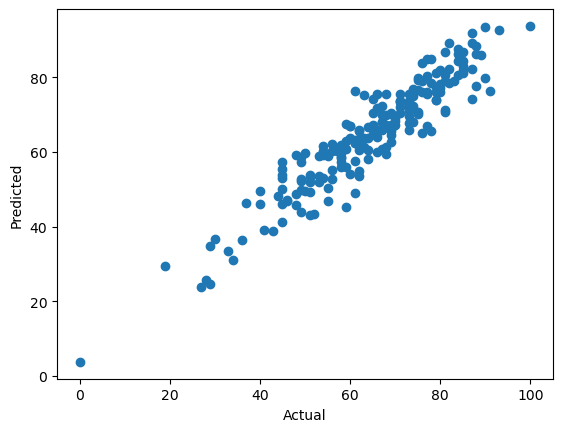

In [95]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

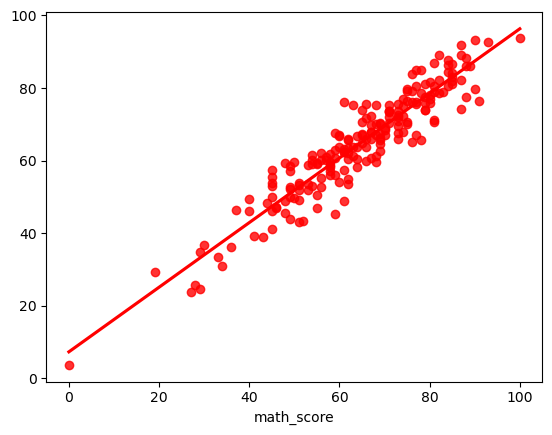

In [96]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [105]:
# kfold cross val
def cross_val(X,y):
    pipeline = make_pipeline(StandardScaler(),  LinearRegression())

    k_fold = KFold(n_splits=6, shuffle=True, random_state=0) 
    scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
    result = cross_validate(pipeline, X, y, cv=k_fold, return_train_score=True, scoring=scoring)
    # type(result)

    cv_df = pd.DataFrame(result)
    cv_df1 = cv_df.drop(['fit_time','score_time'],axis=1)
    summary = cv_df1.describe(percentiles=[])
    return summary.transpose()

In [106]:
cross_val(X,y)

,count,mean,std,min,50%,max
test_neg_mean_absolute_error,6.0,-4.339343,0.235473,-4.754283,-4.276153,-4.127649
train_neg_mean_absolute_error,6.0,-4.232760,0.042887,-4.270548,-4.244366,-4.154328
test_neg_mean_squared_error,6.0,-29.551645,2.433891,-33.564480,-28.712383,-27.217306
train_neg_mean_squared_error,6.0,-28.207169,0.488342,-28.660769,-28.336871,-27.381818
test_neg_root_mean_squared_error,6.0,-5.432398,0.221002,-5.793486,-5.358279,-5.217021
train_neg_root_mean_squared_error,6.0,-5.310875,0.046121,-5.353575,-5.323238,-5.232764
test_r2,6.0,0.869482,0.013361,0.847166,0.872755,0.881837
train_r2,6.0,0.877127,0.002371,0.874850,0.876567,0.880923


# Check For Assumptions
1. __linear__ 
    - __realtionship between independant and dependant variable should be linear__
2. __Normlaity__
    - __The residuals should be normally distributed.__
    - __anderson darling test(unknown mean and variance)__  
4. __No multicollinearity__
    - __The independent variables should not be highly correlated with each other.__
    - __check Variance Inflation Factor (VIF)__
    - __heatmap__
5. __No auto-correlation__
   - __The residuals should not be auto-correlated.__
   - __use durbin watson test__
6. __Homoscedasticity__
    - __The variance of the residuals should be constant across all levels of the independent variables.__
    - __residual plots, Breusch-Pagan test__
7. __Independance__
    - __each observation should be independant of other__ 
    - __use durbin watson test__ 

In [97]:
def residuals(model, X_test, y_test):
    '''
    Creates predictions on the features with the model and calculates residuals
    '''
    y_pred = model.predict(X_test)
    df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [98]:
def check_linear(model, X_test, y_test):
    try:
        df_results = residuals(model, X_test, y_test)
        _,ax = plt.subplots(1, 3, figsize=(15, 6), dpi=80)

        sns.regplot(x='Predicted', y='Actual', data=df_results, lowess=True, ax=ax[0],
                     color='#0055ff', line_kws={'color': '#ff7000', 'ls': '--', 'lw': 2.5})
        ax[0].set_title('Actual vs. Predicted Values', fontsize=15)
        sns.regplot(x='Predicted', y='Residuals', data=df_results, lowess=True, ax=ax[1],
                     color='#0055ff', line_kws={'color': '#ff7000', 'ls': '--', 'lw': 2.5})
        ax[1].set_title('Residuals vs. Predicted Values', fontsize=15)
        sns.residplot(data=df_results, x="Predicted", y="Residuals",lowess=True,
                       line_kws=dict(color="#ff7000",ls= '--'),ax=ax[2])
        ax[1].set_title('Residuals vs. Predicted Values', fontsize=15)
        plt.show()
    except Exception as e:
        print(f"An error occurred: {str(e)}")

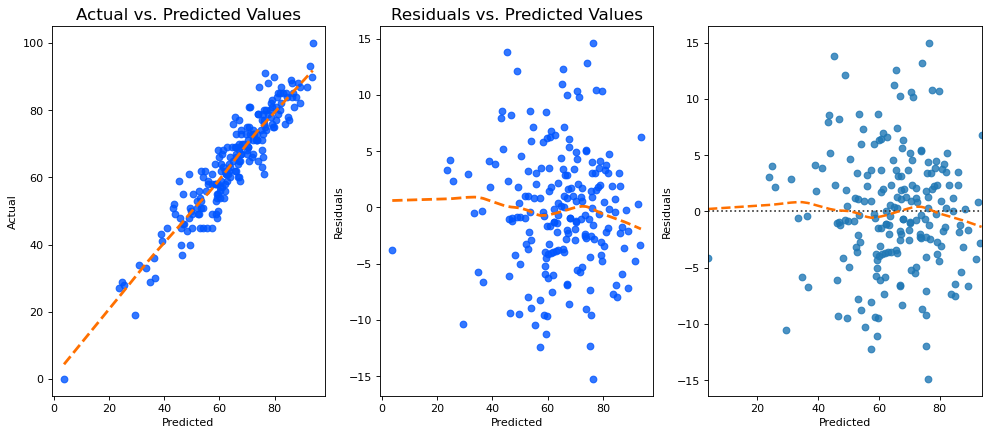

In [99]:
check_linear(lin_model,X_test,y_test)

__fairly linear__

In [100]:
def check_normal_error(model, X_test, y_test, p_value_thresh=0.05):
    df_results = residuals(model, X_test, y_test)
    
    # Anderson-Darling Test
    stats ,p_value = normal_ad(df_results['Residuals'])

    if p_value > p_value_thresh:
        print(f'P values:{p_value:.4f}>0.05 Residuals are normally distributed. Assumption satisfied.')
         
    else:
        print(f'P values:{p_value:.4f}<0.05 Residuals are not normally distributed. Assumption not satisfied.')
    
    _, ax = plt.subplots(1,2, figsize=(15,6), dpi=80)
    sns.histplot(data=df_results, x='Residuals', kde=True, ax=ax[0], bins=15)
    ax[0].set_title('Distribution of Residuals', fontsize=15)
    
    scipy_stats.probplot(df_results['Residuals'], dist="norm", plot=ax[1])
    ax[1].set_title("Residuals Q-Q Plot", fontsize=15)

P values:0.5514>0.05 Residuals are normally distributed. Assumption satisfied.


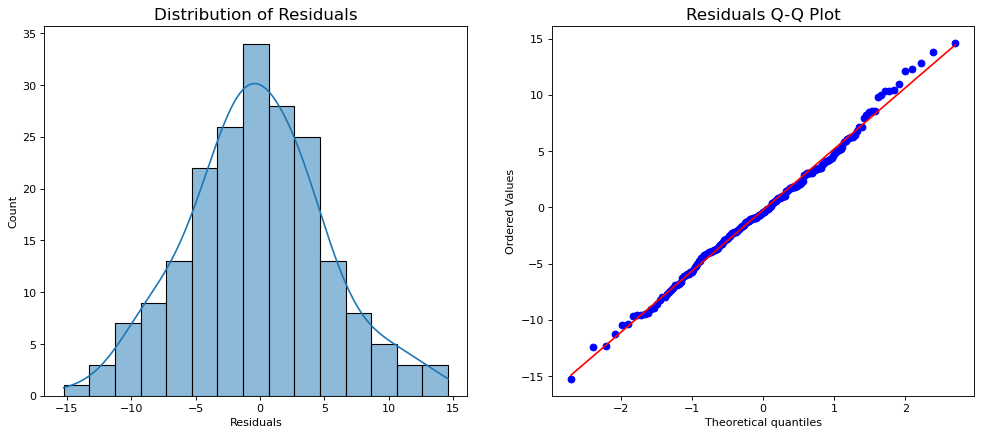

In [101]:
check_normal_error(lin_model, X_test, y_test)

__excellent distribution__

In [102]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_mutlicollinearity(X):
    '''
    This assumes that predictors are not correlated with each other and calculates VIF values of predictors
    '''
    # Ensure all columns are numerical
    booleans= X.select_dtypes(exclude=['int64', 'float64']).columns.to_list()
    for col in booleans:
        X[col] = X[col].map({True: 1, False: 0})
    # Check for duplicate column names
    if len(X.columns) != len(set(X.columns)):
        raise ValueError("Duplicate column names detected.")
    
    # Check for constant columns
    if (X.std() == 0).any():
        raise ValueError("Constant columns detected.")
    
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    possible_multicollinearity = sum([1 for v in vif if v > 10])
    definite_multicollinearity = sum([1 for v in vif if v > 100])
    
    print('{} cases of possible multicollinearity.'.format(possible_multicollinearity))
    print('{} cases of definite multicollinearity.'.format(definite_multicollinearity))
    
    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied.')
        else:
            print('Assumption possibly satisfied.')
    else:
        print('Assumption not satisfied.')
    
    return pd.DataFrame({'vif': vif}, index=X.columns).round(2)

In [118]:
check_mutlicollinearity(X)

2 cases of possible multicollinearity.
2 cases of definite multicollinearity.
Assumption not satisfied.


,vif
reading_score,307.24
writing_score,303.60
gender_male,1.93
race_ethnicity_group B,2.72
race_ethnicity_group C,3.97
race_ethnicity_group D,3.72
race_ethnicity_group E,2.40
parental_level_of_education_bachelor's degree,1.53
parental_level_of_education_high school,1.76
parental_level_of_education_master's degree,1.29


In [120]:
check_mutlicollinearity(X.drop('reading_score',axis=1))

1 cases of possible multicollinearity.
0 cases of definite multicollinearity.
Assumption possibly satisfied.


,vif
writing_score,11.87
gender_male,1.82
race_ethnicity_group B,2.72
race_ethnicity_group C,3.97
race_ethnicity_group D,3.68
race_ethnicity_group E,2.40
parental_level_of_education_bachelor's degree,1.52
parental_level_of_education_high school,1.75
parental_level_of_education_master's degree,1.28
parental_level_of_education_some college,1.92


<Axes: >

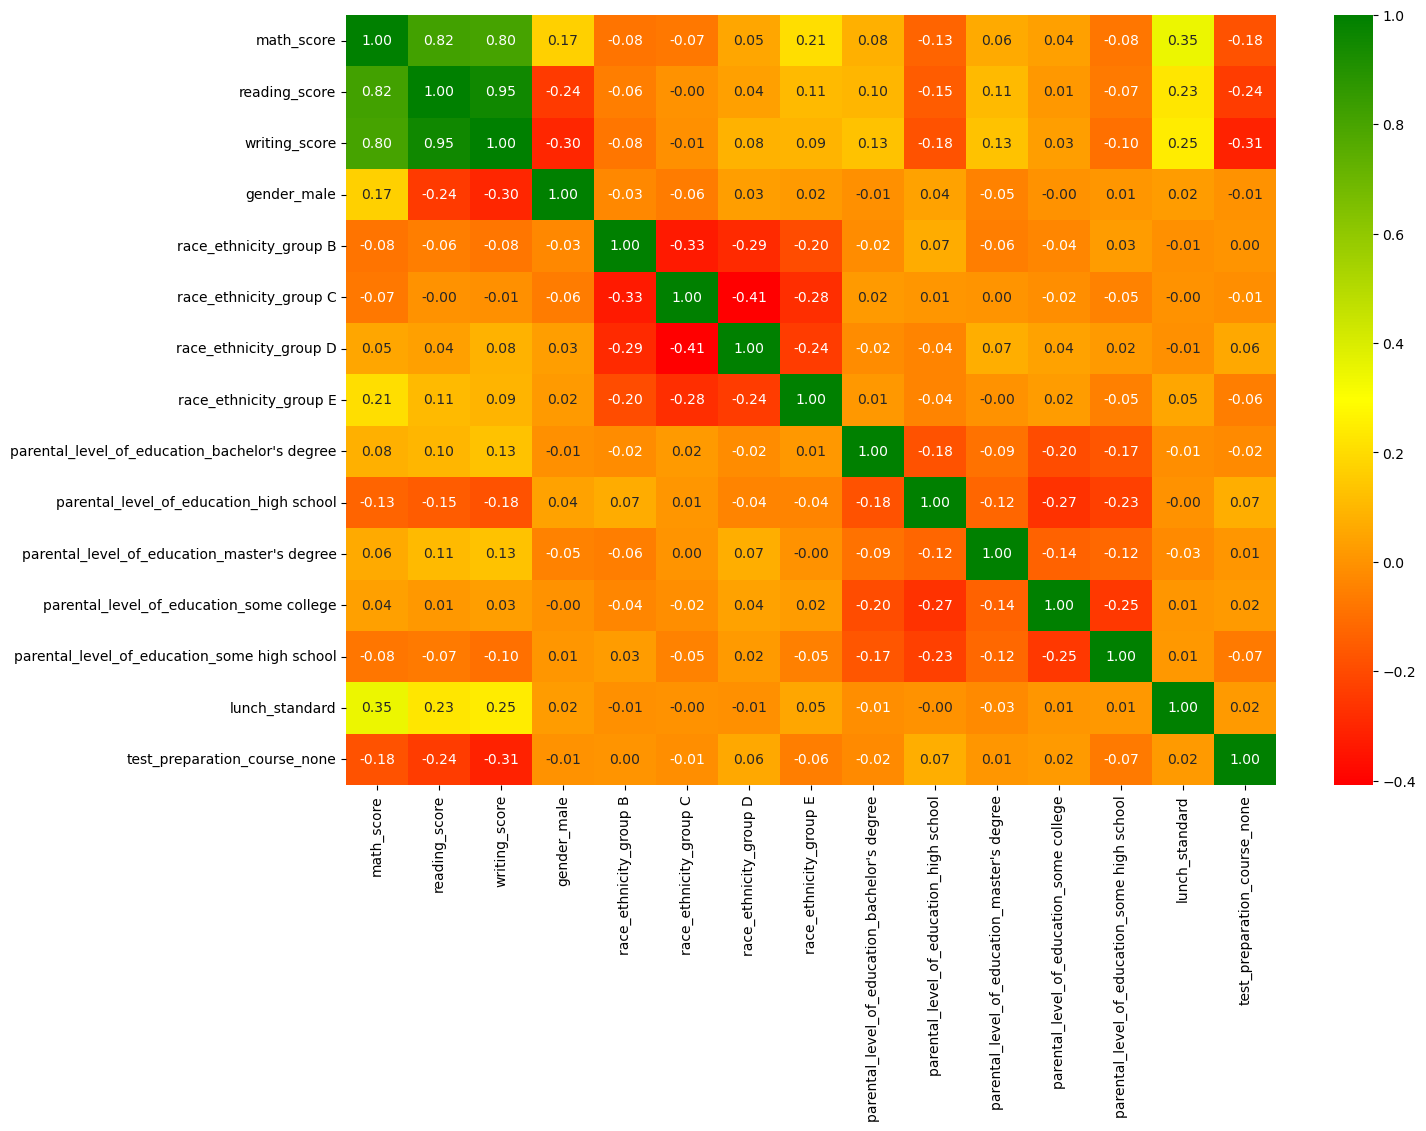

In [116]:
import matplotlib.colors as mcolors
plt.figure(figsize=(15,10))
target = 'Selling_Price'
cmap = mcolors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap=cmap)

__extremly high vif for 2 columns but very low for others__

In [108]:
def check_autocorrelation(model,X_test,y_test):
    
    df_results = residuals(model, X_test, y_test)
    dw = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', round(dw,3))
    if dw < 1.5:
        print('Signs of positive autocorrelation. Assumption not satisfied.', '\n')
    elif dw > 2.5:
        print('Signs of negative autocorrelation. Assumption not satisfied.', '\n')
    else:
        print('Little to no autocorrelation. Assumption satisfied.', '\n')

In [109]:
check_autocorrelation(lin_model,X_test,y_test)

Durbin-Watson: 2.002
Little to no autocorrelation. Assumption satisfied. 



In [110]:
def check_homoscedasticity(model, X_test, y_test):
    print('The orange line should be flat:')
    df_results = residuals(model, X_test, y_test)
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=80)
    sns.regplot(x='Predicted', y='Residuals', data=df_results,ax=ax[0], 
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    ax[0].axhline(y=0, color='#23bf00', lw=1)
    ax[0].set_title('Residuals vs. Predicted Values', fontsize=15)
    ax[0].set_xlabel('Predicted Values', fontsize=12)
    ax[0].set_ylabel('Residuals', fontsize=12)   

    sns.residplot(data=df_results, x="Predicted", y="Residuals",lowess=True, line_kws=dict(color="r"),ax=ax[1])
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=15)
    ax[1].set_xlabel('Predicted', fontsize=12)
    ax[1].set_ylabel('Residuals', fontsize=12)

    plt.show()

The orange line should be flat:


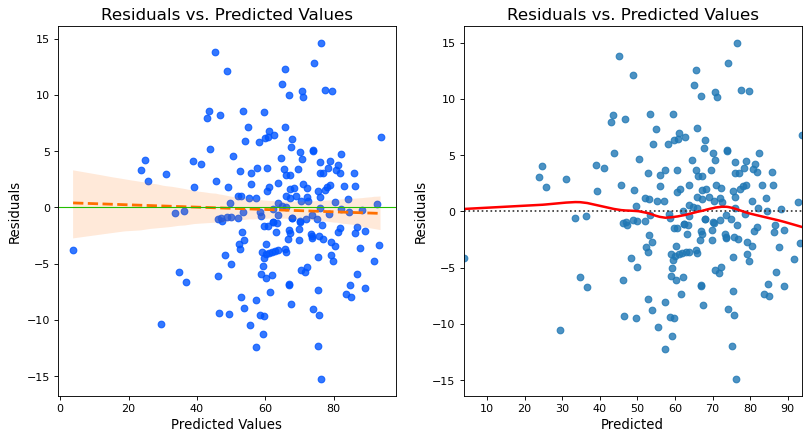

In [111]:
check_homoscedasticity(lin_model,X_test,y_test)

__the orange line isnt flat__

__Potential solutions:__
* __Outlier removal__
* __Appllying log transformation of independent variables__
* __Applying polynomial regression__

In [ ]:
y_test_pred = linear_reg.predict(X_test_scaled)
df_comp = pd.DataFrame({'Actual':y_test_actual, 'Predicted':y_test_pred})

In [ ]:
def compare_plot(df_comp):
    df_comp.reset_index(inplace=True)
    df_comp.plot(y=['Actual','Predicted'], kind='bar', figsize=(20,7), width=0.8)
    plt.title('Predicted vs. Actual Target Values for Test Data', fontsize=20)
    plt.ylabel('Selling_Price', fontsize=15)
    plt.show()

# drop reading score and guessing o/p

In [121]:
X.head()

,reading_score,writing_score,gender_male,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none
0,72,74,0,1,0,0,0,1,0,0,0,0,1,1
1,90,88,0,0,1,0,0,0,0,0,1,0,1,0
2,95,93,0,1,0,0,0,0,0,1,0,0,1,1
3,57,44,1,0,0,0,0,0,0,0,0,0,0,1
4,78,75,1,0,1,0,0,0,0,0,1,0,1,1


In [122]:
XX = X.drop('reading_score',axis=1)

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XX,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [125]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.10
